# Motivation

The goal of the following case study is to gain a deeper insight into the qualities, which indicate a good tasting wine. For that reason we will firstly deepen our domain knowledge, then explore the data and apply different regression models. In conclusion we will use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm as a means to combat the class imbalance between the good and bad wine entries.

**Prediction Models**:  Logistic Regression, Decision Tree Classifier, Naive Bayes, Random Forest Classifier, SVM Classifier <br>
**Improving Accuracy**: Synthesize new data point with the SMOTE algorithm.

<p align="center">
  <img src="../Images/wine.jpg" width="600">

# Section I: Deepening domain knowledge as an aspiring sommelier

### General Information
The data set contains 1599 red vinho verde wine taste testing results.
Each sample was evaluated by a minimum of three sensory assessors
(using blind tastes), which graded the wine in a scale that ranges from
0 (very bad) to 10 (excellent). The final sensory score is given by the
median of these evaluations [[Cortez et al., 2009, p. 2]](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub).

### Feature information 

| Feature | Unit | Description |
|:-|:-|:-|
| **fixed acidity** | g/dm³ | Fixed acidity is a measurement of the total concentration of titratable acids and free hydrogen ions.  These acids either occur naturally or are created through the fermentation process. Citric acid also falls under this category.|
| **volatile acidity** | g/dm³ | The amount of volatile acidity defines the spoilage of a wine. Some winemakers however seek a low level of this kind of acidity, to add to the perceived complexity of a wine. |
| **citric acid** | g/dm³ | Citric acids are generally found in very small quantities. They act as a preservative, are added to increase acidity or to attain a unique flavor. |
| **residual sugar** | g/dm³ | Residual Sugar describes the natural grape sugar, which is leftover after the fermentation has ended. During winemaking, yeast normally converts all sugar into alcohol, however, sometimes not all the sugar is fermented. The path to a remarkable wine is to find the perfect balance between sweetness and sourness. |
| **chlorides** | g/dm³ | Chlorides can give a wine a certain “salty taste”. Although not necessarily desirable, the right amount can give the wine an additional nuance. |
| **free sulfur dioxide** | mg/dm³ | Free sulfur dioxide is a measure of the amount of SO2 that is not bound to other molecules. Used throughout all stages of the winemaking process, it serves to prevent oxidation and microbial growth. |
| **total sulfur dioxide** | mg/dm³ | Total Sulfur Dioxide is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals. |
| **density** | g/cm³ | Monitoring the density during the fermentation allows for optimal control of the sugar conversion process into ethanol. Sweeter wines generally have a higher density. |
| **pH** | - | Winemakers are aiming for high pH levels, as high as 4.0. This makes wines taste softer. |
| **sulphates** | g/dm³ | An increase in sulphates might be related to the fermenting nutrition, which is very important to improve the wine aroma. |
| **alcohol** | vol.% | Although not unique to solely wine, alcohol is probably on of the main reasons, why mankind has enjoyed the taste of wine for millennia. |

Deducting from the information above, we can conclude some correlations, which one would expect to occur. Testing these can be a good way to see, how firm our understanding of the data is.

| feature pair | correlation |
|:-:|:-:|
| fixed acidity, pH | **-** |
| fixed acidity, citric acid | **+** |
| volatile acidity, quality | **-** |
| residual sugar, density | **+** |
| free sulfur dioxide, total sulfur dioxide | **+** |
| density, alcohol | **-** |

 ### Citation
 The used dataset is public available for research. The details are described in [[Cortez et al., 2009]](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub). The Dataset can be downloaded from the UCI Machine Learning Repository [[Source]](https://archive.ics.uci.edu/ml/datasets/wine+quality)
 <p>
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.  <br>

# Section II: Data Exploration

In [1]:
#Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#store resulting plots also in the notebook document
%matplotlib inline

In [2]:
#Importing data
data = pd.read_csv('../Data/winequality-red.csv', sep=';')

In [3]:
#Getting an overview of the data at hand
round(data.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [4]:
#More detailed information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#count of each target variable
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

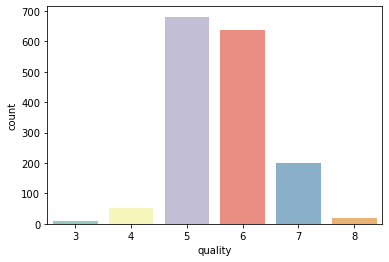

In [6]:
#count of the target variable
sns.countplot(x='quality', data = data, palette="Set3")

The mean quality with 5.6 is just barely above average. There are also no 1,2,9 or 10 quality level wines. This can also be due the test design itself with the end result being the median of three independent sensory tests.

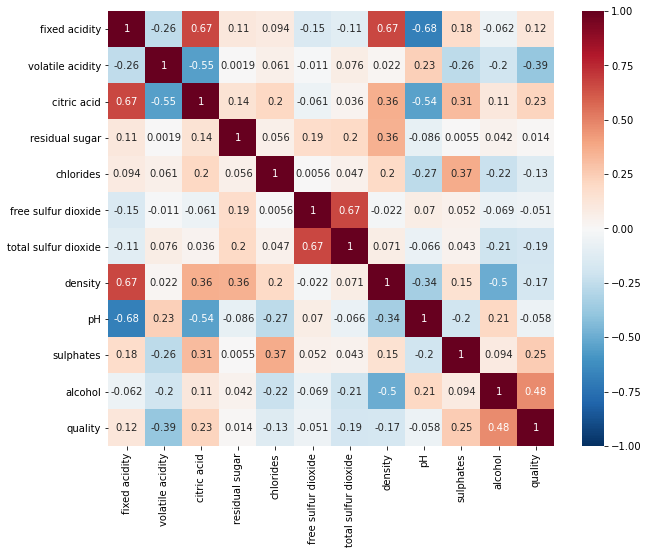

In [7]:
#Plotting correlation heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation, annot = True, vmin = -1, cmap = "RdBu_r")

| feature pair | correlation assumption | result |
|:-:|:-:|:-:|
| fixed acidity, pH | **-** | -0.68 |
| fixed acidity, citric acid | **+** | 0.67 |
| volatile acidity, quality | **-** | -0.39 |
| residual sugar, density | **+** | 0.36 |
| free sulfur dioxide, total sulfur dioxide | **+** | 0.67 |
| density, alcohol | **-** | -0.5 |

Overall the guessed correlation tendencies fit into our understanding of the data. Although some pairings showcase a correlation, some are not as strong as initially anticipated. Residual sugar and density for example are not strongly correlated. The pairs overall show no strong correlation above 0.7. 
<p>
Note: The strongest positive correlation with our target variable "quality" stems from the "alcohol" level. The most negative impact so far originates from the "volatile acidity" feature.  

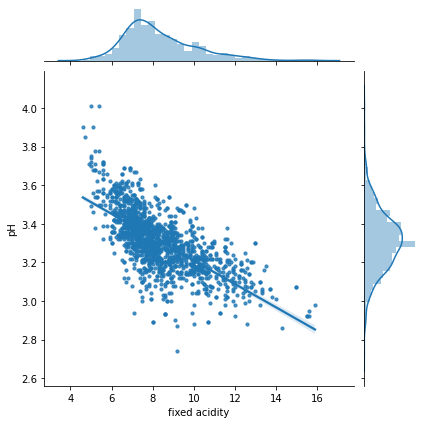

In [8]:
#Additional plots to investigate the correlations
#Create a new dataframe containing only pH and fixed acidity columns
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draw a regression plot 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draw a distribution plot
gridA = gridA.plot_marginals(sns.distplot)

pH < 7 : acidic solution <br>
pH = 7 : neutral solution <br>
pH > 7 : alkaline solution <br>
<p>
An increase in the amount of "fixed acidity" decreases the pH value.

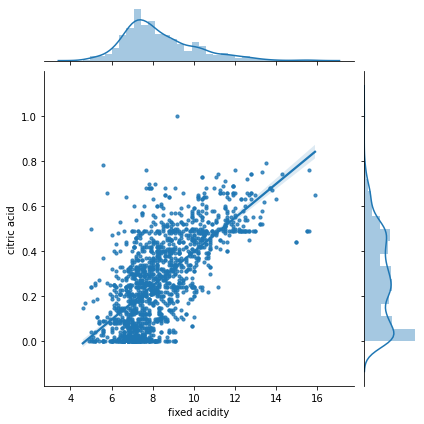

In [9]:
#Create a new dataframe containing only fixedAcidity and citricAcid columns
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]

#Initialize a joint-grid
gridB = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, height=6)

#Draw a regression plot 
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draw a distribution plot
gridB = gridB.plot_marginals(sns.distplot)

"Fixed acidity" and "citric acid" are intertwined. An idea would be to drop the "citric acid" feature but it could also be the case that small changes in the citric taste of a wine distinguish a mediocre tasting wine from a good one.

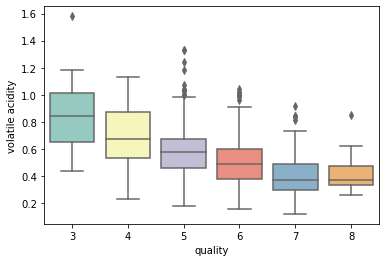

In [10]:
#Boxplot to further investigate the target value
sns.boxplot('quality', 'volatile acidity', data = data, palette="Set3")

With "volatile acidity" as an indicator of spoilage and therefore decreasing the quality of a wine, makes this plot  consistent with our domain knowledge.

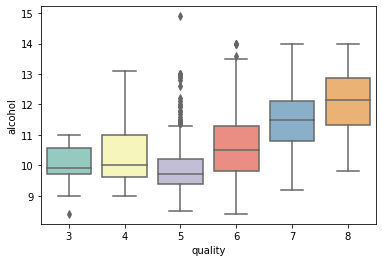

In [11]:
sns.boxplot('quality', 'alcohol', data = data, palette="Set3")

Higher volumes of alcohol seem to indicate a good wine. But some wines of 5 and 6 quality levels are also in the range or above the levels of alcohol in a level 8 wine. Alcohol could serve as  a foundation for a good wine, but may not be the sole reason for the excitement in the tasters taste buts.

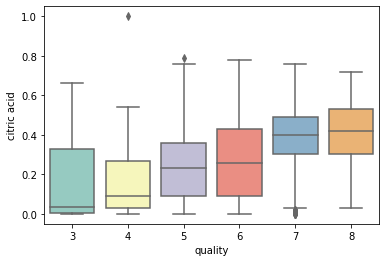

In [12]:
sns.boxplot('quality', 'citric acid', data = data, palette="Set3")

"Citric acid" seems to be more related to a higher rated wine.

# Section III: Preprocessing the data

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
#Making binary classificaion for the response variable.
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [15]:
#Assign labels to the target variable
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

In [16]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

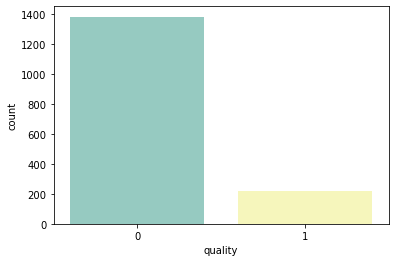

In [17]:
#Plotting the distribution of good to bad wines
sns.countplot(data['quality'], palette="Set3")

In [18]:
round(data['quality'].value_counts()[0] / data['quality'].value_counts()[1], 1)

6.4

With a ratio of **1: 6.4** a certain degree of class imbalance can be attested. We will now use the logistic regression model to explore the effects of this imbalance.

# Section IV: Testing the impact of imbalanced data

In [19]:
#Seperate the data as target variable and feature variabes
X = data.drop('quality', axis = 1)
y = data['quality']

In [20]:
#Applying Standard scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
#Train and Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [23]:
#Model performance
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



Although the accuracy of the model is quite high with **0.87**, the f1-score for the good wine class is way to low with **0.38**. The accuracy score is heavily skewed because of the class imbalance.

# Section V: Combating class imbalance with the SMOTE algorithm
To combat the class imbalance we could randomly downsample the bad wine class or randomly upsample the good wine class. In this notebook we will utilize the SMOTE algorithm (Synthetic Minority Oversampling Technique), which will synthesize new good wine entries.

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [25]:
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [26]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After  SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 1109, 1: 170})
After  SMOTE : Counter({0: 1109, 1: 1109})


In [27]:
lr.fit(X_train_smote, y_train_smote)
lr_predict_smote = lr.predict(X_test)

In [28]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, lr_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, lr_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       273
           1       0.42      0.87      0.57        47

    accuracy                           0.81       320
   macro avg       0.70      0.83      0.72       320
weighted avg       0.89      0.81      0.83       320



Although the accuracy decreased by 6% the good wine f1-score saw an uptick by 20%. With that the reduced accuracy better reflects the real quality of the model.  

### F1-Score Intermission

To make the later comparison of the different prediction models easier and to reinforce my understanding of the underlying nature of the used metrics and their origin in the confusion matrix, i will define a little function to compute the precision, recall, f1-score and the accuracy score.  

Definition: In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). 

[[Source]](https://en.wikipedia.org/wiki/F1_score)

In [29]:
#Showcase the confusion matrix for the initial logistic regression model
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print(lr_conf_matrix)

[[264   9]
 [ 34  13]]


In [30]:
#Defining a function, which computes the precision, recall, f1-score and accuracy score
def model_stats (y_test, rg_predict):
    #Import packages
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import statistics 
    
    conf_matrix = confusion_matrix(y_test, rg_predict)
    output = []
    for i in range(len(lr_conf_matrix)):
        #Precision
        p = conf_matrix[i,i] / conf_matrix[:,i].sum()
        output.append(p)
        #Recall
        r = conf_matrix[i,i] / conf_matrix[i].sum()
        output.append(r)
        #F1-score
        f1_score = statistics.harmonic_mean([p,r])
        output.append(f1_score)
    
    #Accuracy score
    acc_score = np.trace(conf_matrix) / conf_matrix.sum()
    output.append(acc_score)
    
    return output

In [31]:
#Creating Dataframe for easier later comparison
df = pd.DataFrame(model_stats(y_test, lr_predict), columns=['lg'], 
                  index = ["Precision_0","Recall_0","F1_Score_0","Precision_1","Recall_1","F1_Score_1","Accuracy_Score"])

In [32]:
df['lg_smote'] = model_stats(y_test, lr_predict_smote)
df

,lg,lg_smote
Precision_0,0.885906,0.973094
Recall_0,0.967033,0.794872
F1_Score_0,0.924694,0.875000
Precision_1,0.590909,0.422680
Recall_1,0.276596,0.872340
F1_Score_1,0.376812,0.569444
Accuracy_Score,0.865625,0.806250


# Section VI: Applying additional prediction models

### Decision Tree Classifier

In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

#Decision Tree with Upsampled Data
dt.fit(X_train_smote,y_train_smote)
dt_predict_smote = dt.predict(X_test)

#Extending Model Stats DataFrame
df['dt'] = model_stats(y_test, dt_predict)
df['dt_smote'] = model_stats(y_test, dt_predict_smote)

In [34]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, dt_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, dt_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       273
           1       0.63      0.57      0.60        47

    accuracy                           0.89       320
   macro avg       0.78      0.76      0.77       320
weighted avg       0.88      0.89      0.89       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       273
           1       0.52      0.68      0.59        47

    accuracy                           0.86       320
   macro avg       0.73      0.79      0.75       320
weighted avg       0.88      0.86      0.87       320



### Naive Bayes

In [35]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

#NaiveBayes with Upsampled Data
nb.fit(X_train_smote,y_train_smote)
nb_predict_smote = nb.predict(X_test)

#Extending Model Stats DataFrame
df['nb'] = model_stats(y_test, nb_predict)
df['nb_smote'] = model_stats(y_test, nb_predict_smote)

In [36]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, nb_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, nb_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

    accuracy                           0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       273
           1       0.34      0.87      0.49        47

    accuracy                           0.73       320
   macro avg       0.66      0.79      0.66       320
weighted avg       0.88      0.73      0.77       320



### Random Forest Classifier

In [37]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

#RandomForest classifier with Upsampled Data
rf.fit(X_train_smote, y_train_smote)
rf_predict_smote=rf.predict(X_test)

#Extending Model Stats DataFrame
df['rf'] = model_stats(y_test, rf_predict)
df['rf_smote'] = model_stats(y_test, rf_predict_smote)

In [38]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, rf_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, rf_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.70      0.49      0.57        47

    accuracy                           0.89       320
   macro avg       0.81      0.73      0.76       320
weighted avg       0.88      0.89      0.89       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       273
           1       0.68      0.77      0.72        47

    accuracy                           0.91       320
   macro avg       0.82      0.85      0.83       320
weighted avg       0.92      0.91      0.91       320



### SVM Classifier with rbf kernel

In [39]:
#SVM Classifier with rbf kernel
from sklearn.svm import SVC
svc_rbf = SVC()
svc_rbf.fit(X_train, y_train)
svc_rbf_predict=svc_rbf.predict(X_test)

#RSVM Classifier with Upsampled Data
svc_rbf.fit(X_train_smote, y_train_smote)
svc_rbf_predict_smote=svc_rbf.predict(X_test)

#Extending Model Stats DataFrame
df['svc_rbf'] = model_stats(y_test, svc_rbf_predict)
df['svc_rbf_smote'] = model_stats(y_test, svc_rbf_predict_smote)

In [40]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, svc_rbf_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, svc_rbf_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       273
           1       0.49      0.89      0.63        47

    accuracy                           0.85       320
   macro avg       0.73      0.87      0.77       320
weighted avg       0.91      0.85      0.86       320



# Section VII: Comparing the model performances and final thoughts

In [41]:
#Showcase the collected data from all prediction models
round(df,2)

,lg,lg_smote,dt,dt_smote,nb,nb_smote,rf,rf_smote,svc_rbf,svc_rbf_smote
Precision_0,0.89,0.97,0.93,0.94,0.96,0.97,0.92,0.96,0.88,0.98
Recall_0,0.97,0.79,0.94,0.89,0.86,0.71,0.96,0.94,0.98,0.84
F1_Score_0,0.92,0.88,0.93,0.92,0.91,0.82,0.94,0.95,0.93,0.90
Precision_1,0.59,0.42,0.63,0.52,0.49,0.34,0.70,0.68,0.71,0.49
Recall_1,0.28,0.87,0.57,0.68,0.79,0.87,0.49,0.77,0.26,0.89
F1_Score_1,0.38,0.57,0.60,0.59,0.60,0.49,0.57,0.72,0.38,0.63
Accuracy_Score,0.87,0.81,0.89,0.86,0.85,0.73,0.89,0.91,0.88,0.85


In [42]:
#Reducing the collected data for a better overview
df_highlight = df.drop(['Precision_0', 'Recall_0', 'Precision_1', 'Recall_1'])

In [43]:
df_highlight.style.highlight_max(axis=1)

,lg,lg_smote,dt,dt_smote,nb,nb_smote,rf,rf_smote,svc_rbf,svc_rbf_smote
F1_Score_0,0.924694,0.875000,0.934545,0.915254,0.905222,0.820296,0.939286,0.948148,0.930556,0.903353
F1_Score_1,0.376812,0.569444,0.600000,0.587156,0.601626,0.491018,0.575000,0.720000,0.375000,0.631579
Accuracy_Score,0.865625,0.806250,0.887500,0.859375,0.846875,0.734375,0.893750,0.912500,0.875000,0.846875


### Findings :
 - Alcohol content has the strongest positive impact on the perceived quality of a wine. The volatile acidity has the strongest negative impact. The dataset itself, however,  does not allow for a conclusive statement in this regard.
 - Interestingly enough, synthesizing new good wine data points almost always increased the corresponding f1-score. Only in case of the naive bayes algorithm could a decrease in the f1-score be observed.
 - The random forest classifier with synthesized upsampled data returns the best results for predicting whether a wine is a good tasting one or not and therefore should be prioritized.
 
### Further investigation ideas:
 - Introducing additional prediction models and adding them to our comparison data frame.
 - Analyzing outliers in the dataset and the effect of their removal on the models prediction accuracy.
 - Reducing the number of features corresponding to the insights gained from the correlation matrix.
 - Applying a principal component analysis and investigating if a component reduction improves the performance of the prediction models or if the loss in information would strongly impact our ability in predicting a good wine.  